In [ ]:
# Install dependencies (jalankan hanya sekali di environment baru)
!pip install roboflow

# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO
from roboflow import Roboflow


In [ ]:
rf = Roboflow(api_key="FrjXPITiwVkHO5g8vcXu")
project = rf.workspace("neodocs-eye-conjunctiva").project("conjunctiva-segmentation-hcw8d")
dataset = project.version(5).download("yolov8")  # format YOLOv8 segmentation


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset_dir = "conjunctiva-segmentation-5"
subsets = ['train', 'valid', 'test']

data = []

for subset in subsets:
    img_folder = os.path.join(dataset_dir, subset, "images")
    label_folder = os.path.join(dataset_dir, subset, "labels")

    if not os.path.exists(label_folder):
        continue  # skip jika folder tidak ada

    label_files = [f for f in os.listdir(label_folder) if f.endswith(".txt")]

    for file in label_files:
        label_path = os.path.join(label_folder, file)
        image_path_jpg = os.path.join(img_folder, file.replace(".txt", ".jpg"))
        image_path_png = os.path.join(img_folder, file.replace(".txt", ".png"))

        image_path = image_path_jpg if os.path.exists(image_path_jpg) else image_path_png

        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                class_id = int(parts[0])
                points = list(map(float, parts[1:]))  # normalized polygon
                data.append({
                    'subset': subset,
                    'image': image_path,
                    'class_id': class_id,
                    'polygon': points
                })

df = pd.DataFrame(data)
df.head()


subset                                              image  class_id  \
0  train  conjunctiva-segmentation-5/train/images/500_pn...         1   
1  train  conjunctiva-segmentation-5/train/images/500_pn...         0   
2  train  conjunctiva-segmentation-5/train/images/IMG_20...         1   
3  train  conjunctiva-segmentation-5/train/images/IMG_20...         0   
4  train  conjunctiva-segmentation-5/train/images/b8596f...         1   

                                             polygon  
0  [0.46242394140625004, 0.6219719208984374, 0.41...  
1  [0.5047431184895833, 0.7532627348632812, 0.472...  
2  [0.49936035740740736, 0.447544896875, 0.418625...  
3  [0.5235858361111111, 0.6078644526041667, 0.556...  
4  [0.6336160200617285, 0.5436213364197531, 0.610...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17913 entries, 0 to 17912
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subset    17913 non-null  object
 1   image     17913 non-null  object
 2   class_id  17913 non-null  int64 
 3   polygon   17913 non-null  object
dtypes: int64(1), object(3)
memory usage: 559.9+ KB


In [ ]:
!pip install ultralytics

In [ ]:
# Load model YOLOv8-segmentation (pretrained)
model = YOLO('yolov8m-seg.pt')  # atau ganti dengan yolov8s-seg.pt / yolov8m-seg.pt sesuai kekuatan GPU Anda

# Train model dengan dataset Anda
model.train(
    data='conjunctiva-segmentation-5/data.yaml',
    epochs=10,
    imgsz=640,
    batch=8,
    task='segment'
)


Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=conjunctiva-segmentation-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

train: Scanning /content/conjunctiva-segmentation-5/train/labels.cache... 7809 images, 0 backgrounds, 30 corrupt: 100%|██████████| 7809/7809 [00:00<?, ?it/s]

train: /content/conjunctiva-segmentation-5/train/images/02_JPG.rf.0fbb934dbbddacd9fef7eb4535d99c72.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0265      1.0507]
train: /content/conjunctiva-segmentation-5/train/images/02_JPG.rf.15fefeb1edc353515df8fed0b584c52d.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0182]
train: /content/conjunctiva-segmentation-5/train/images/03_JPG.rf.7d478e288ff3063505dced7c68ec2d57.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0086]
train: /content/conjunctiva-segmentation-5/train/images/03_JPG.rf.81cdb89840ca59aab197c09f3f8d3bb0.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1851      1.1407]
train: /content/conjunctiva-segmentation-5/train/images/04_JPG.rf.89ebb9ed57840b3c00df4176e6cd7ff7.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3666]
train: /content/

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 133.4±143.0 MB/s, size: 211.7 KB)


val: Scanning /content/conjunctiva-segmentation-5/valid/labels.cache... 742 images, 1 backgrounds, 0 corrupt: 100%|██████████| 742/742 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10       3.9G      1.238      2.075      1.081      1.645          7        640: 100%|██████████| 973/973 [06:20<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:15<00:00,  3.05it/s]

                   all        742       1497      0.823      0.864      0.883      0.552      0.802      0.836      0.835      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.54G      1.192      1.901     0.8721      1.597          6        640: 100%|██████████| 973/973 [06:06<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:14<00:00,  3.21it/s]


                   all        742       1497       0.85      0.865      0.893      0.585      0.835      0.843      0.864      0.474

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.62G      1.145       1.82     0.8217       1.56          6        640: 100%|██████████| 973/973 [06:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:14<00:00,  3.14it/s]

                   all        742       1497      0.872      0.861      0.895      0.581      0.864       0.84      0.865      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.68G        1.1      1.745     0.7657      1.511          6        640: 100%|██████████| 973/973 [06:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:14<00:00,  3.17it/s]

                   all        742       1497      0.923      0.907      0.943       0.63      0.878      0.862      0.878      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.68G      1.058      1.684     0.7208      1.471          6        640: 100%|██████████| 973/973 [06:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:14<00:00,  3.17it/s]

                   all        742       1497      0.913      0.898      0.933      0.635      0.898      0.887      0.913      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.68G      1.029       1.62     0.6868      1.447          6        640: 100%|██████████| 973/973 [06:03<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:15<00:00,  3.09it/s]


                   all        742       1497      0.949      0.912      0.961      0.655      0.929      0.883      0.923      0.537

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.68G          1      1.565     0.6481      1.421          6        640: 100%|██████████| 973/973 [06:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:14<00:00,  3.17it/s]

                   all        742       1497      0.944      0.921      0.957       0.66      0.927      0.897      0.921      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.68G     0.9688       1.52     0.6176      1.391          7        640: 100%|██████████| 973/973 [06:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:14<00:00,  3.24it/s]


                   all        742       1497      0.947      0.923      0.961      0.683      0.928      0.906      0.928      0.557

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.68G     0.9438      1.476     0.5879      1.369          6        640: 100%|██████████| 973/973 [06:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:14<00:00,  3.22it/s]

                   all        742       1497       0.96      0.934      0.969       0.68      0.935      0.904      0.926      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.68G     0.9144      1.432     0.5568      1.342          6        640: 100%|██████████| 973/973 [06:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:14<00:00,  3.21it/s]

                   all        742       1497      0.963      0.933      0.967      0.699      0.937      0.908      0.935      0.569



10 epochs completed in 1.078 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 54.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,223,542 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:17<00:00,  2.72it/s]


                   all        742       1497      0.963      0.933      0.967      0.699      0.937      0.908      0.935      0.569
           conjunctiva        734        734      0.935       0.91      0.944      0.564      0.884       0.86       0.88      0.403
                   eye        741        763      0.991      0.955       0.99      0.834      0.991      0.955       0.99      0.735
Speed: 0.2ms preprocess, 10.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/segment/train2


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x781852d1d010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

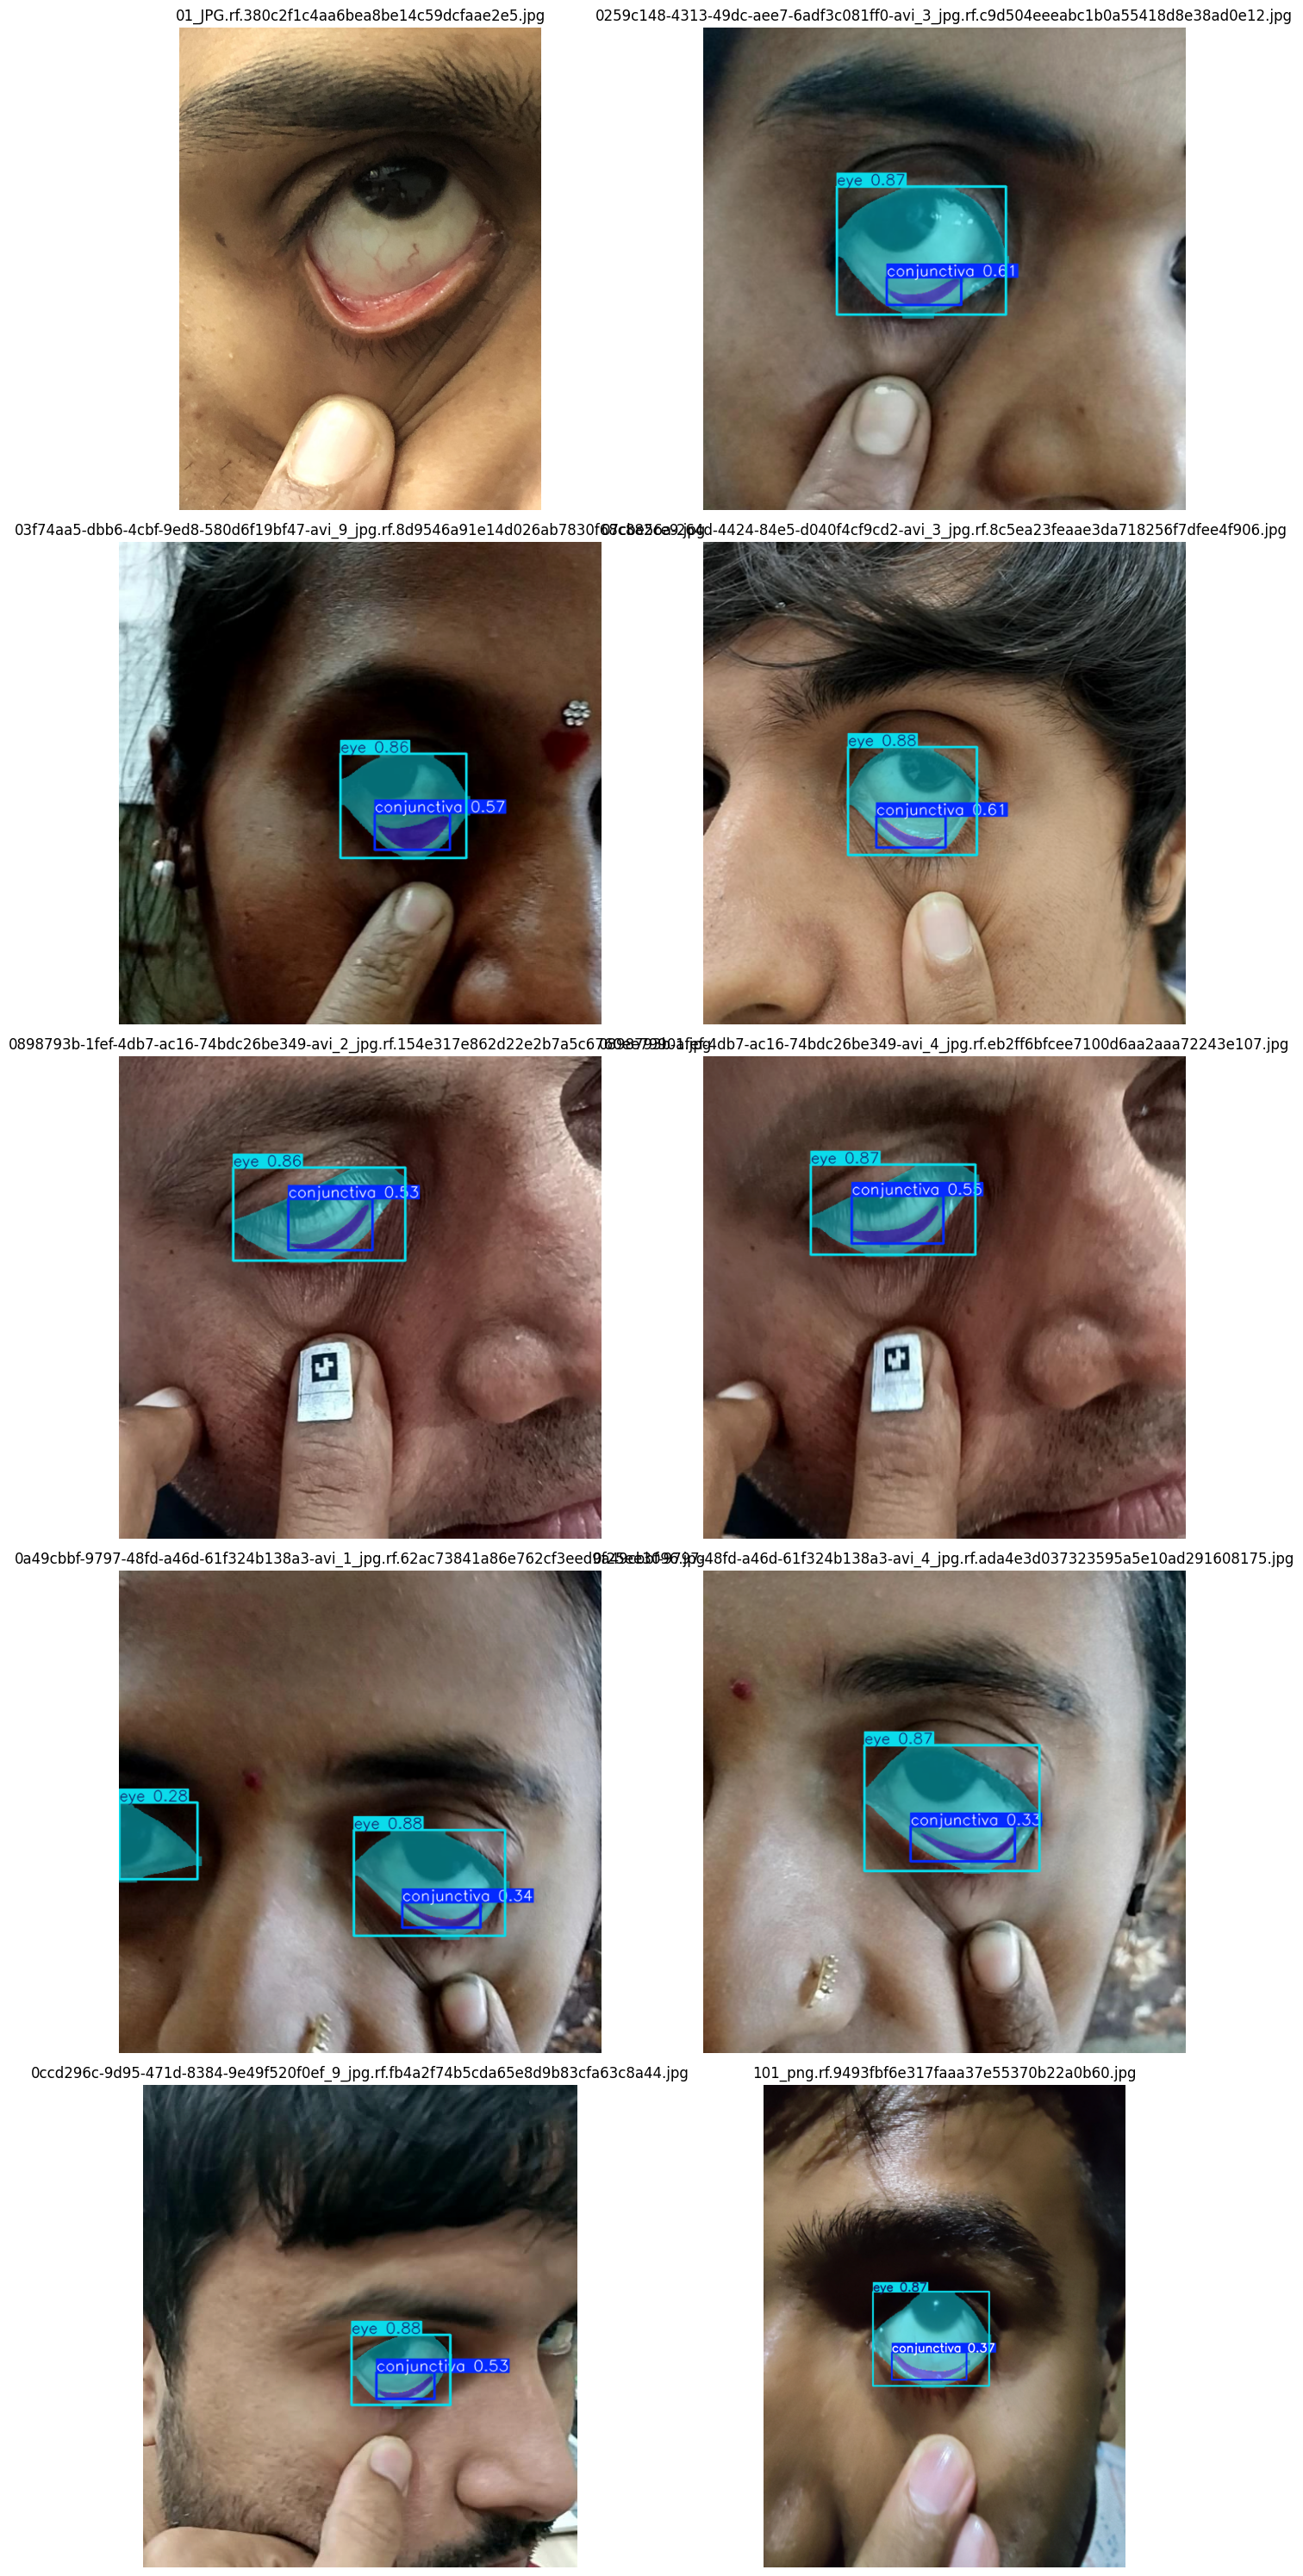

In [ ]:
# Load model yang sudah dilatih
model = YOLO("/content/runs/segment/train/weights/best.pt")

# Ambil path semua gambar dari folder test
test_dir = "/content/conjunctiva-segmentation-5/test/images"
image_paths = sorted([os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png'))])

# Batasi ke 10 gambar pertama
image_paths = image_paths[:10]

# Buat plot hasil inferensi
plt.figure(figsize=(15, 30))
for i, img_path in enumerate(image_paths):
    results = model(img_path, save=False, verbose=False)  # Tidak menyimpan hasil

    # Ambil hasil prediksi dan plot sebagai numpy array
    result_img = results[0].plot()  # Gambar hasil prediksi

    plt.subplot(5, 2, i+1)
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(img_path))
    plt.axis("off")

plt.tight_layout()
plt.show()


Tidak ada mask pada 01_JPG.rf.380c2f1c4aa6bea8be14c59dcfaae2e5.jpg


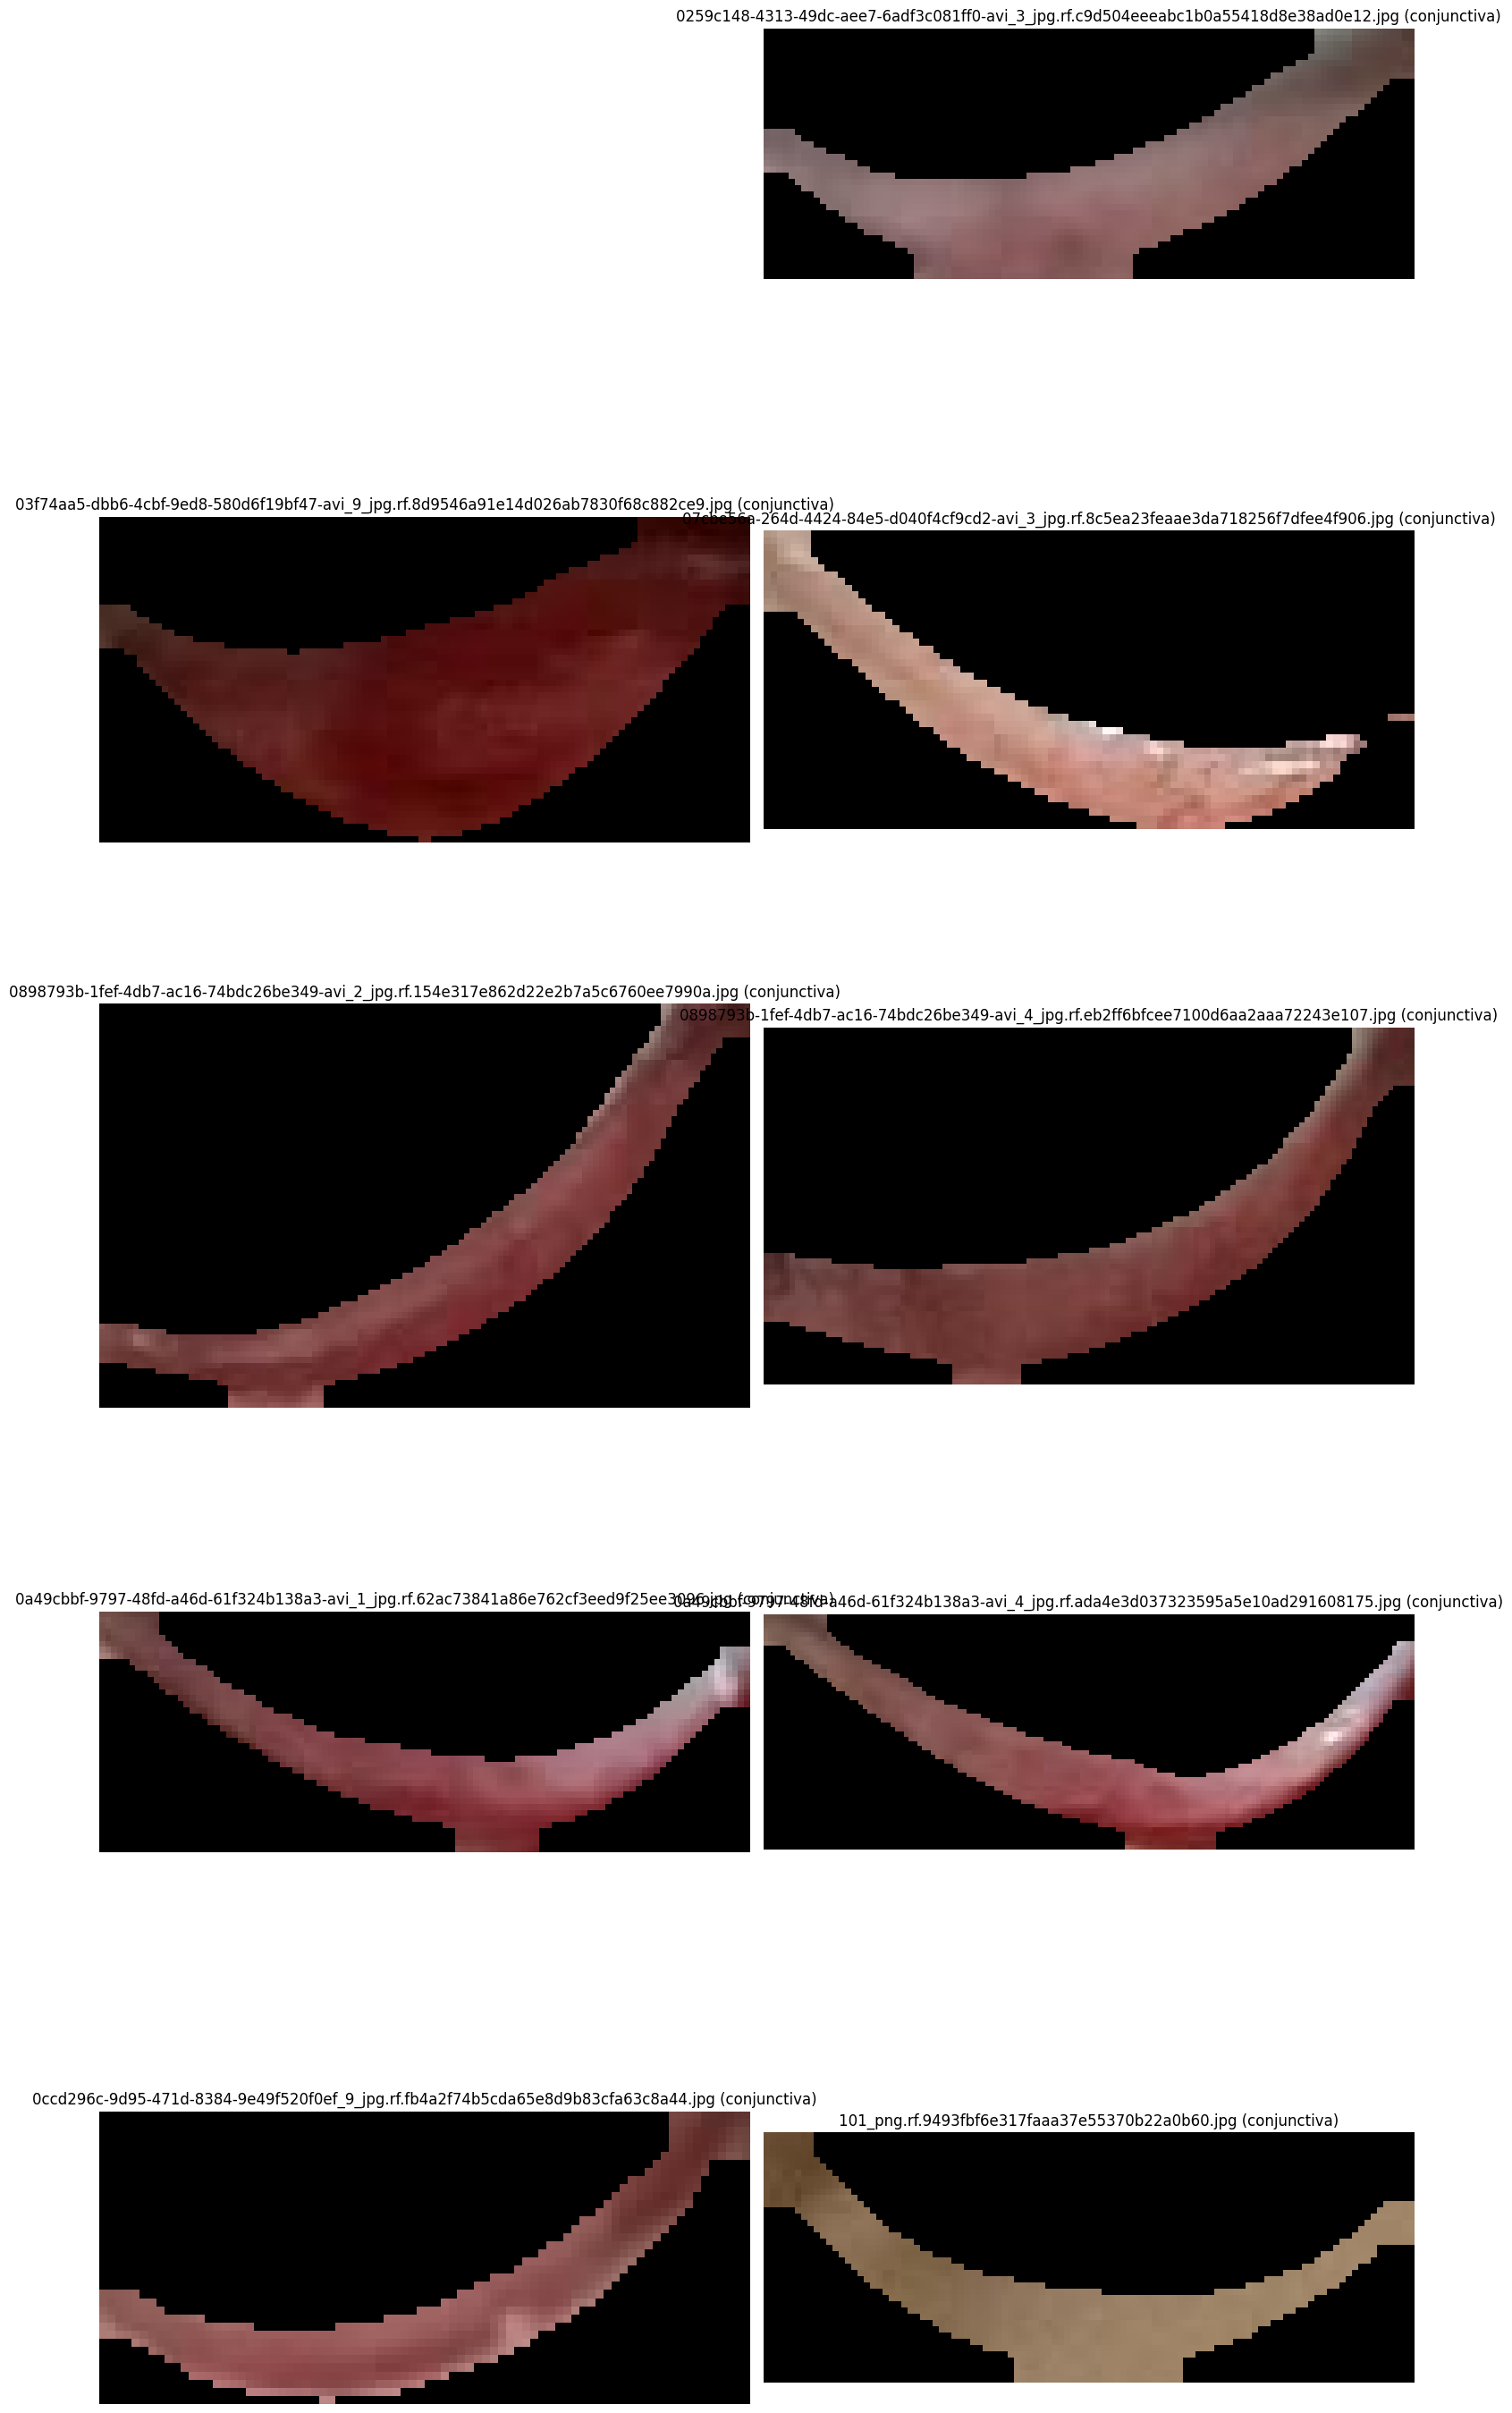

In [ ]:
  model = YOLO("/content/runs/segment/train/weights/best.pt")

  # Ambil path semua gambar dari folder test
  test_dir = "/content/conjunctiva-segmentation-5/test/images"
  image_paths = sorted([os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png'))])

  # Buat folder untuk menyimpan hasil
  output_dir = "/content/conjunctiva_crops"
  os.makedirs(output_dir, exist_ok=True)

  # Batasi ke 10 gambar pertama
  image_paths = image_paths[:10]

  # Buat plot hasil segmentasi
  plt.figure(figsize=(15, 30))

  for i, img_path in enumerate(image_paths):
      # Inferensi
      results = model(img_path, save=False, verbose=False)[0]

      # Baca gambar asli
      img = cv2.imread(img_path)

      # Cek apakah hasil segmentasi tersedia
      if results.masks is None or results.boxes is None:
          print(f"Tidak ada mask pada {os.path.basename(img_path)}")
          continue

      found_conjunctiva = False

      for j, mask in enumerate(results.masks.data):
          class_id = int(results.boxes.cls[j].item())
          class_name = model.names[class_id]

          if class_name != 'conjunctiva':
              continue

          found_conjunctiva = True
          binary_mask = mask.cpu().numpy().astype(np.uint8) * 255

          if np.sum(binary_mask) == 0:
              continue

          x, y, w, h = cv2.boundingRect(binary_mask)
          img_crop = img[y:y+h, x:x+w]
          mask_crop = binary_mask[y:y+h, x:x+w]

          segmented = cv2.bitwise_and(img_crop, img_crop, mask=mask_crop)

          out_path = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(img_path))[0]}_conj_{j}.png")
          cv2.imwrite(out_path, segmented)

          # Tampilkan
          plt.subplot(5, 2, i+1)
          plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
          plt.title(f"{os.path.basename(img_path)} (conjunctiva)")
          plt.axis("off")

      if not found_conjunctiva:
          print(f"Tidak ditemukan kelas 'conjunctiva' pada {os.path.basename(img_path)}")

  plt.tight_layout()
  plt.show()


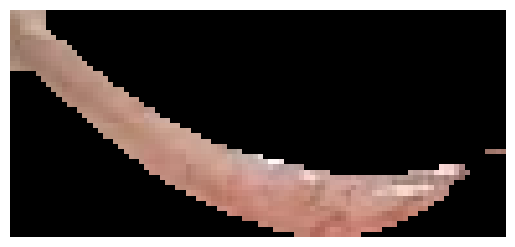

In [ ]:
# Load model
model = YOLO("/content/runs/segment/train/weights/best.pt")

# Path ke 1 gambar (ganti dengan nama file yang diinginkan)
img_path = "/content/conjunctiva-segmentation-5/test/images/07cbe56a-264d-4424-84e5-d040f4cf9cd2-avi_3_jpg.rf.8c5ea23feaae3da718256f7dfee4f906.jpg"

# Folder untuk menyimpan hasil crop
output_dir = "/content/conjunctiva_crops"
os.makedirs(output_dir, exist_ok=True)

# Inference
results = model(img_path, save=False, verbose=False)[0]
img = cv2.imread(img_path)

# Cek segmentasi
if results.masks is not None and results.boxes is not None:
    found_conjunctiva = False

    for j, mask in enumerate(results.masks.data):
        class_id = int(results.boxes.cls[j].item())
        class_name = model.names[class_id]

        if class_name != 'conjunctiva':
            continue

        found_conjunctiva = True
        binary_mask = mask.cpu().numpy().astype(np.uint8) * 255

        if np.sum(binary_mask) == 0:
            continue

        x, y, w, h = cv2.boundingRect(binary_mask)
        img_crop = img[y:y+h, x:x+w]
        mask_crop = binary_mask[y:y+h, x:x+w]
        segmented = cv2.bitwise_and(img_crop, img_crop, mask=mask_crop)

        out_path = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(img_path))[0]}_conj_{j}.png")
        cv2.imwrite(out_path, segmented)

        # Tampilkan
        plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

    if not found_conjunctiva:
        print(f"Tidak ditemukan kelas 'conjunctiva' pada {os.path.basename(img_path)}")
else:
    print(f"Tidak ada hasil segmentasi pada {os.path.basename(img_path)}")


In [ ]:
# Load model hasil training
model = YOLO("/content/runs/segment/train/weights/best.pt")

# Ekspor ke ONNX
model.export(format="onnx", dynamic=True, opset=12)


Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.30GHz)
YOLOv8m-seg summary (fused): 105 layers, 27,223,542 parameters, 0 gradients, 110.0 GFLOPs

PyTorch: starting from '/content/runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 38, 8400), (1, 32, 160, 160)) (52.3 MB)

ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.53...
ONNX: export success ✅ 11.5s, saved as '/content/runs/segment/train/weights/best.onnx' (104.0 MB)

Export complete (20.1s)
Results saved to /content/runs/segment/train/weights
Predict:         yolo predict task=segment model=/content/runs/segment/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=segment model=/content/runs/segment/train/weights/best.onnx imgsz=640 data=conjunctiva-segmentation-5/data.yaml  
Visualize:       https://netron.app


'/content/runs/segment/train/weights/best.onnx'